In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
duplicates = titanic[titanic.duplicated()]
duplicated_rows_count = duplicates.shape[0]
duplicated_rows_count

0

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
meanAgeTrain = titanic.groupby(['Pclass', 'Sex'])['Age'].transform('mean')
titanic['Age'] = titanic['Age'].fillna(meanAgeTrain)

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

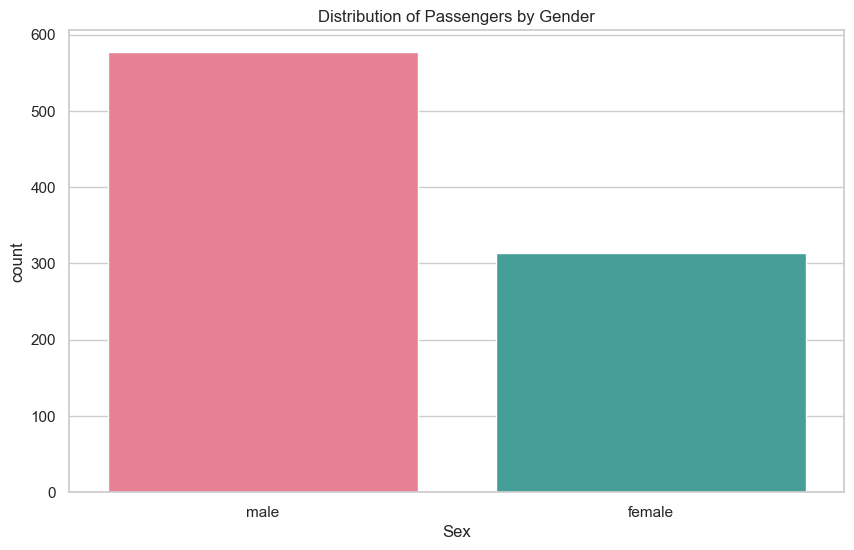

In [14]:



sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  


sns.countplot(x='Sex', data=titanic, palette='husl')  
plt.title('Distribution of Passengers by Gender')
plt.show()

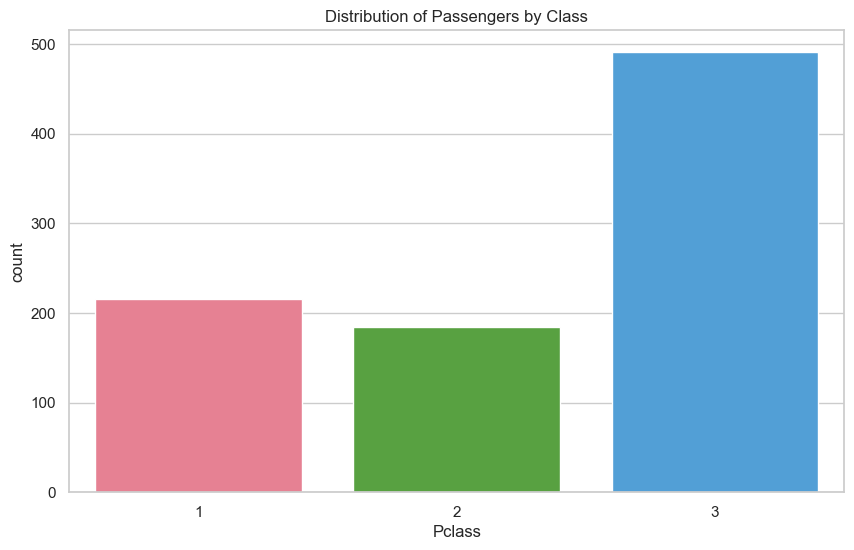

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  


sns.countplot(x='Pclass', data=titanic, palette='husl')  
plt.title('Distribution of Passengers by Class')
plt.show()

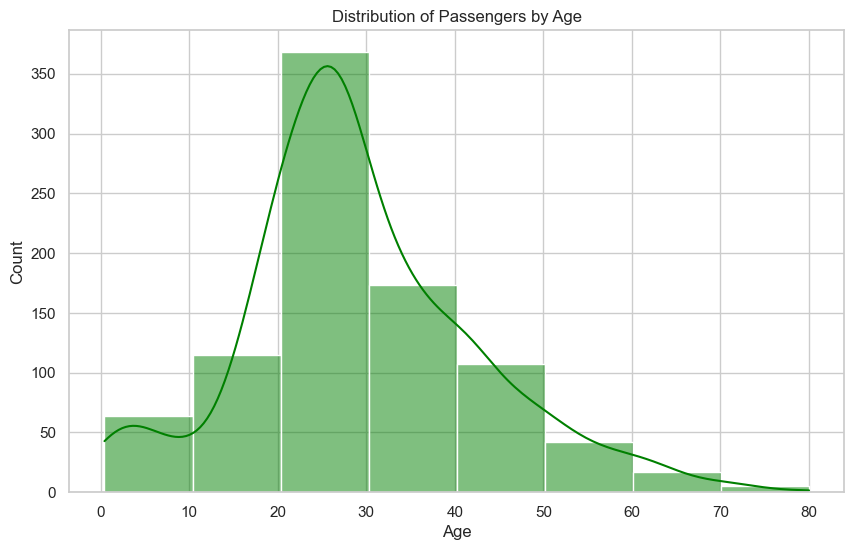

In [15]:
dark_green = sns.dark_palette("green", reverse=True)[0]

plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'].dropna(), bins=8, kde=True, color=dark_green)
plt.title('Distribution of Passengers by Age')
plt.xlabel('Age')
plt.show()

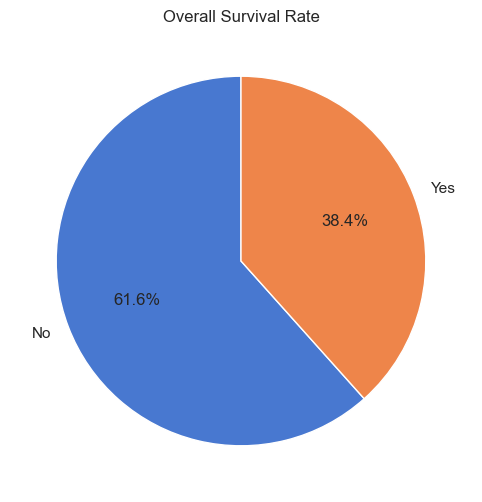

In [16]:
plt.figure(figsize=(10, 6))  
custom_colors = sns.color_palette('muted')

survived_counts = titanic['Survived'].value_counts()
labels = ['No', 'Yes']

plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', colors=custom_colors, startangle=90)
plt.title('Overall Survival Rate')

plt.show()

In [17]:
titanic['Age'].describe()

count    891.000000
mean      29.318643
std       13.281103
min        0.420000
25%       21.750000
50%       26.507589
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
print('Oldest person who survived was at', titanic[titanic['Survived'] == 1]['Age'].max(), 'years old')
print('Youngest person who survived was at', titanic[titanic['Survived'] == 1]['Age'].min(), 'years old')
print('Average age of the survivors was {:.1f} years old'.format(titanic[titanic['Survived'] == 1]['Age'].mean()))


Oldest person who survived was at 80.0 years old
Youngest person who survived was at 0.42 years old
Average age of the survivors was 28.2 years old


In [20]:
from tabulate import tabulate

survival_counts = titanic.pivot_table(index='Sex', columns='Survived', aggfunc='size', fill_value=0)

survival_counts.columns = ['No', 'Yes']

pretty_table = tabulate(survival_counts, headers='keys', tablefmt='pretty')

print("Survival Count for Each Gender:")
print(pretty_table)

Survival Count for Each Gender:
+--------+-----+-----+
|  Sex   | No  | Yes |
+--------+-----+-----+
| female | 81  | 233 |
|  male  | 468 | 109 |
+--------+-----+-----+


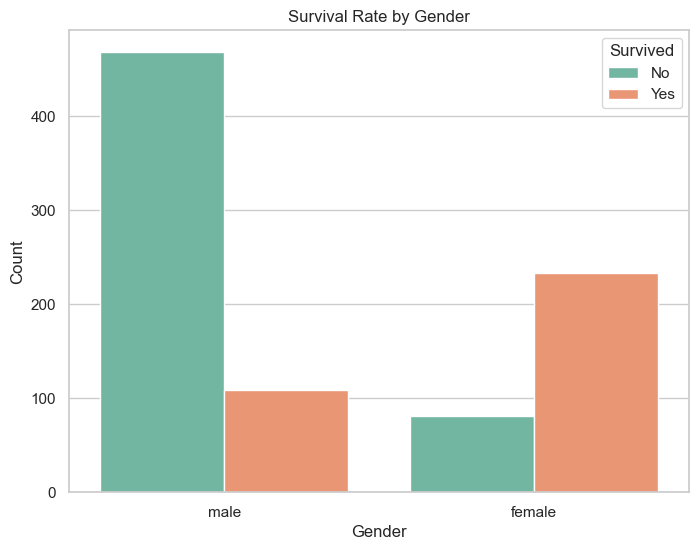

In [21]:
plt.figure(figsize=(8, 6))  
custom_colors = sns.color_palette('Set2')

sns.countplot(x='Sex', hue='Survived', data=titanic, palette=custom_colors)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

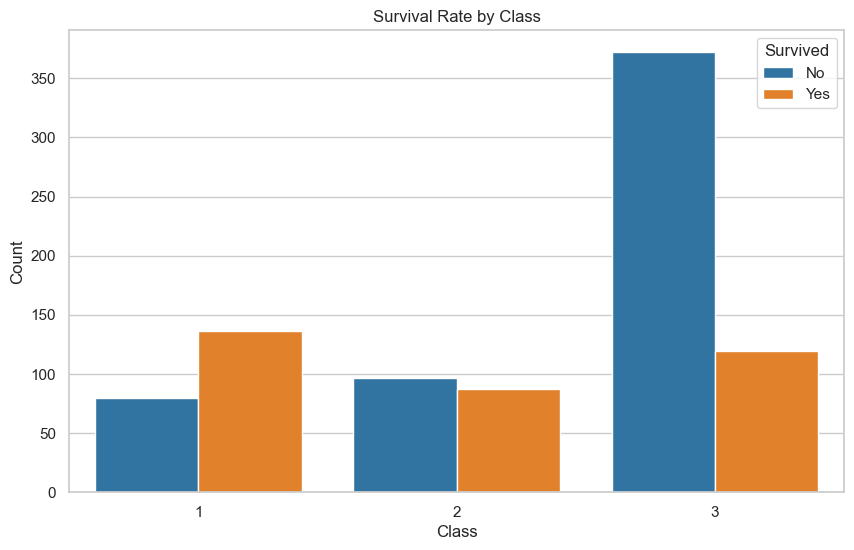

In [22]:
plt.figure(figsize=(10, 6))  
custom_colors = sns.color_palette('tab10')

sns.countplot(x='Pclass', hue='Survived', data=titanic, palette=custom_colors)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

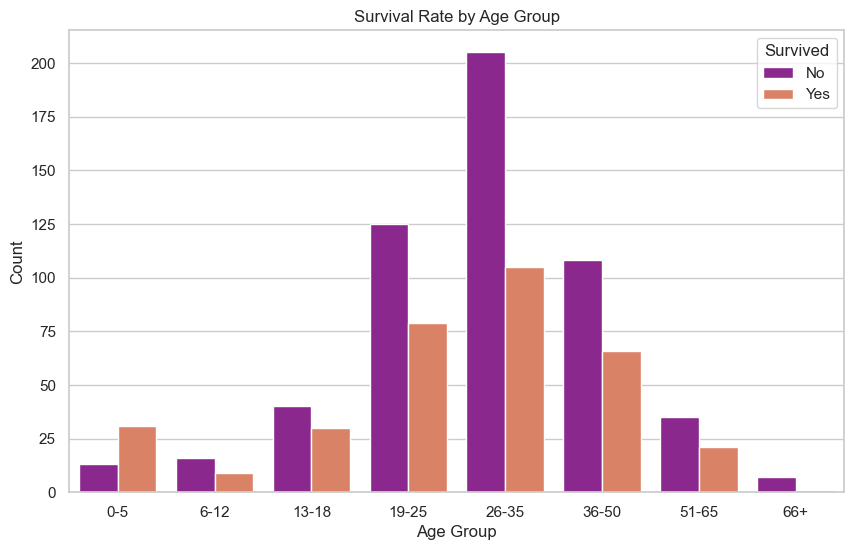

In [23]:

age_bins = [0, 5, 12, 18, 25, 35, 50, 65, 80]
age_labels = ['0-5', '6-12', '13-18', '19-25', '26-35', '36-50', '51-65', '66+']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 6))

sns.countplot(x='AgeGroup', hue='Survived', data=titanic, palette='plasma', order=age_labels)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


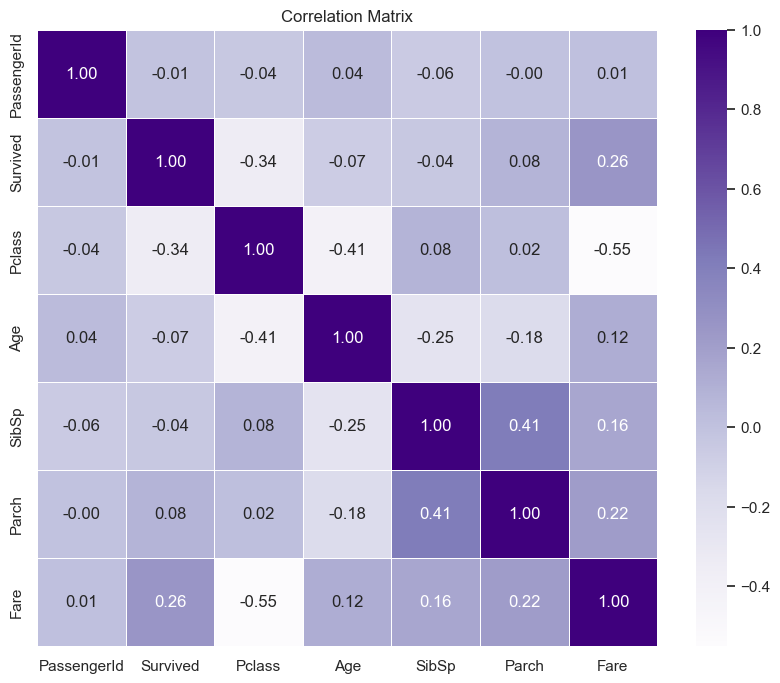

In [25]:

numeric_columns = titanic.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numeric_columns.corr()



plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



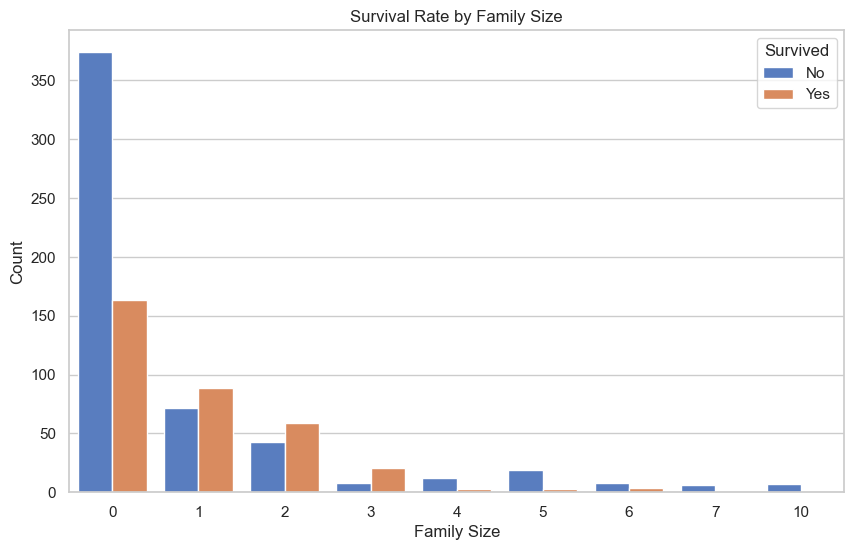

In [26]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

plt.figure(figsize=(10, 6))

sns.countplot(x='FamilySize', hue='Survived', data=titanic, palette='muted')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

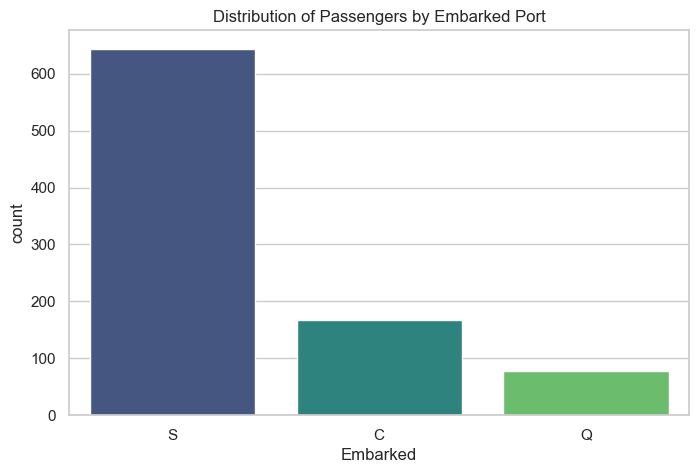

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=titanic, palette='viridis')
plt.title('Distribution of Passengers by Embarked Port')
plt.show()

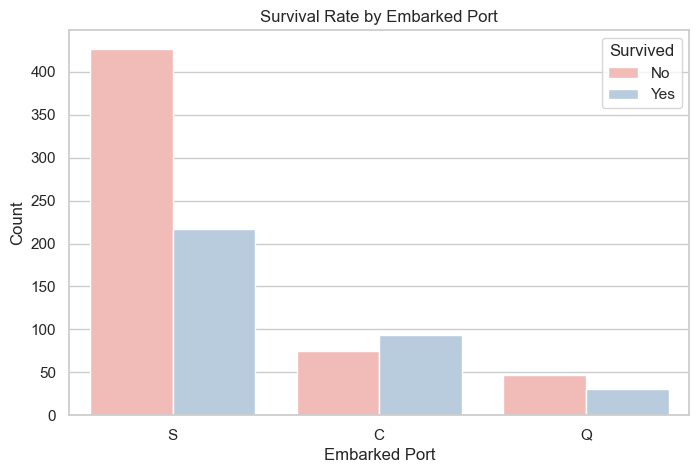

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(x='Embarked', hue='Survived', data=titanic, palette='Pastel1')
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()
